<a href="https://www.kaggle.com/code/umarzafar/unveiling-wealth-eda-of-billionaires-data?scriptVersionId=150731971" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv


<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#000000;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:#000000;
            background-color:#ffffff;
            overflow:hidden;
            font-weight:500">A Journey into Key Insights</div>


* **US,China and India** have the **most Billionaires**
* In industries, **Finance & Investments,Manufacturing and Technology** produce the **most Billionaires**
*  **Healthcare Industry's Billionaires** has the **Most Wealth(15% of total)**
* **United States(540) and China(506)** have **Most Self-Made Billionaires**
* **Technology Industry's Billionaires** has **7.4% Wealth out of total**
* **Manufacturing Industry's Billionaires** has the **Least Wealth (0.97%)**
* **69%** of **Billionaires** are **Self-Made**
* **31%** of **Billionaires** have **Inherited Wealth**
* **Technology** and **Finance & Investments** industries produce the **most Self-Made Billionaires**
* **87%** of Billionaires are **Male**
* **13%** of Billionaires are **Female**
* **60% of Billionaires** fall in the **Age Range 50-70**
* **Average age** of **Billionaires** in the **US is 67.3 years**
* **Average age** of **Billionaires** in **China is 58.6 years**

In [2]:
import seaborn as sns
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go

In [3]:
data = pd.read_csv('/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv')

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#ffffff;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:#ffffff;
            background-color:#0000ff;
            overflow:hidden;
            font-weight:500">Let's Dive Deep into Data</div>

In [4]:
data.head() 

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [6]:
data.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [7]:
data.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#d6ff54;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:#d6ff54;
            background-color:#367c27;
            overflow:hidden;
            font-weight:500">EXPLORATORY DATA ANALYSIS</div>

In [8]:
data.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

<div style="padding:20px; 
            color:#36FF00;
            margin:10px;
            font-size:110%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #36FF00;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">Which Country has the Most Billionaires?</div>

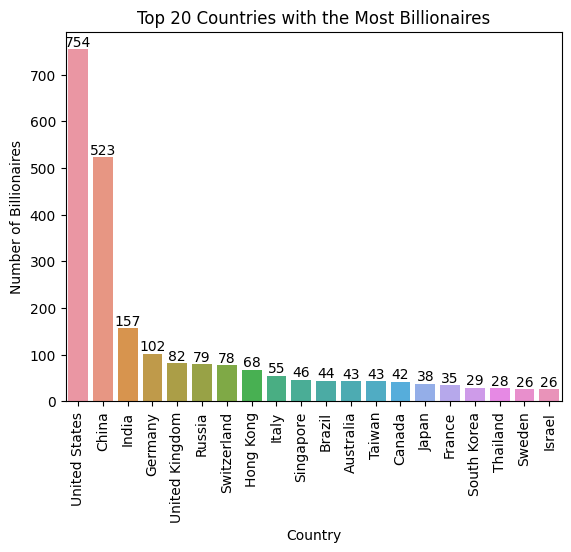

In [9]:
d = data['country'].value_counts()[0:20]
c_plot = sns.barplot(x=d.index, y=d.values)

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.title('Top 20 Countries with the Most Billionaires')

c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()

US,China and India have the most Billionaires

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#eca912;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #eca912;
            background-color:#ff0000;
            overflow:hidden;
            font-weight:500">Countries Having Most Billionaires Geospatially:</div>

In [10]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

spatial_data = data[['latitude_country','longitude_country','country']]
spatial_data=spatial_data.dropna()

df = spatial_data.copy()
df = df.rename(columns={'latitude_country': 'Latitude',
                        'longitude_country': 'Longitude',
                        'country':'Country'})

# Group by country and count the number of billionaires
billionaires_count = df.groupby('Country').size().reset_index(name='Billionaires')

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map with billionaires count data
world = world.merge(billionaires_count, how='left', left_on='name', right_on='Country')

# Fill missing values with 0 (for countries without billionaires)
world['Billionaires'] = world['Billionaires'].fillna(0)

# Create choropleth map
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=billionaires_count,
    columns=['Country', 'Billionaires'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Billionaires',
).add_to(m)

# Add markers for individual billionaires (optional)
marker_cluster = MarkerCluster().add_to(m)
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f'Country: {row["Country"]}',
        icon=None  # You can customize the marker icon here
    ).add_to(marker_cluster)

# Display the map
m.save('billionaires_map.html')
m

/tmp/ipykernel_20/2598702119.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Which Industries are Producing Most Billionaires?</div>

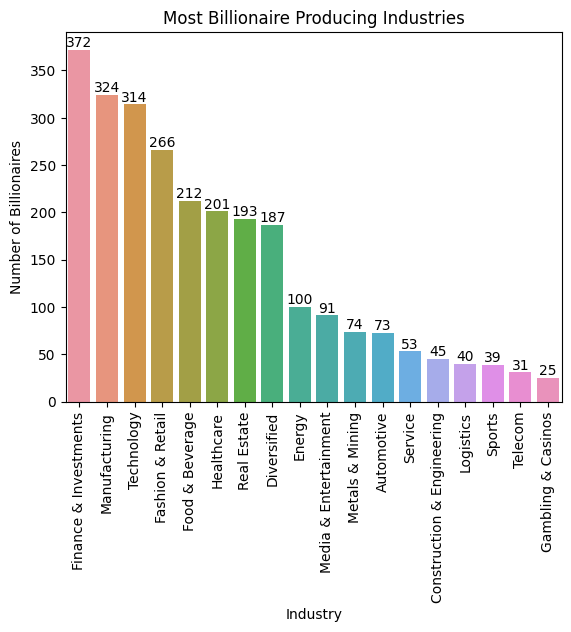

In [11]:
d = data['industries'].value_counts()
c_plot = sns.barplot(x=d.index, y=d.values)

plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.title('Most Billionaire Producing Industries')

c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()

                In industries, Finance & Investments,Manufacturing and Technology produce                 the most Billionaires

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#004400;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:#004400;
            background-color:#00ff00;
            overflow:hidden;
            font-weight:500">Which Industries have a major Contribution in Billionaire's Wealth?</div>

In [12]:
industries =data['industries'].value_counts().index
industries = list(industries)
total_wealth = data['finalWorth'].sum()
x_data = data.groupby('industries')['finalWorth'].sum().reset_index()
final_worth = list(x_data['finalWorth'])
total_value = sum(final_worth)
#
# Calculate percentage contributions
fig = go.Figure(go.Sunburst(
    labels=industries,
    parents=[''] * len(industries),  # Empty string for the root (top-level) parent
    values=final_worth,
    textinfo='label+percent entry',
))

# Update layout for better visualization
#fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    title='Sunburst Chart for Industry Contribution in Wealth',  # Add a title
    width=700,  # Set the width of the figure
    height=500,  # Set the height of the figure
)
# Show the plot
fig.show()

                    Industries with their Contribution in total Wealth

*  **Healthcare Industry's Billionaires** has the **Most Wealth(15% of total)**
* **Technology Industry's Billionaires** has **7.4% Wealth out of total**
* **Manufacturing Industry's Billionaires** has the **Least Wealth (0.97%)**

<div style="padding:20px; 
            color:#36FF00;
            margin:10px;
            font-size:110%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #36FF00;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">Sunburst Chart</div>

In [13]:
total_value = sum(final_worth)

# Calculate percentage contributions
percentages = [(value / total_value) * 100 for value in final_worth]

# Create sunburst chart
fig = go.Figure(go.Sunburst(
    labels=['Total', *industries],
    parents=['', 'Total', 'Total', 'Total', 'Total', 'Total', 'Total'
            , 'Total', 'Total', 'Total', 'Total', 'Total', 'Total', 'Total',
             'Total', 'Total', 'Total', 'Total', 'Total', 'Total', 'Total', 'Total',
             'Total'],
    values=[100, *percentages],
))

# Update layout for better visualization
#fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    title='Sunburst Chart for Industry Contribution in Wealth',  # Add a title
    width=600,  # Set the width of the figure
    height=700,)
# Show the plot
fig.show()


                  Industries with their Contribution in total Wealth(Half Circle)

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#eca912;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #eca912;
            background-color:#340023;
            overflow:hidden;
            font-weight:500">Percentage Count of Self-Made and Inherited Billionaires: </div>

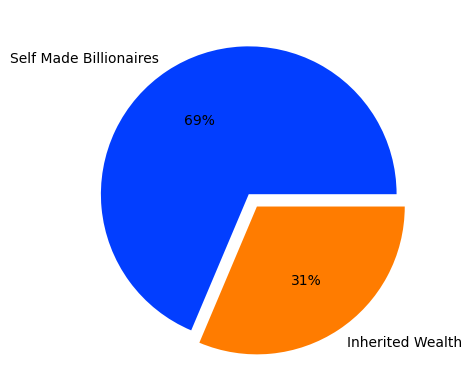

In [14]:
d = data['selfMade']
d =d.map({True: 'Self Made Billionaires', False: 'Inherited Wealth'})


val = d.value_counts().values 
keys = d.value_counts().index
  
explode = [0, 0.1] 
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(val, labels=keys, colors=palette_color, 
        explode=explode, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

69% of Billionaires are Self-Made

31% of Billionaires have Inherited Wealth


<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#ffffff;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #ffffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">Self-Made Billionaires w.r.t Countries:</div>

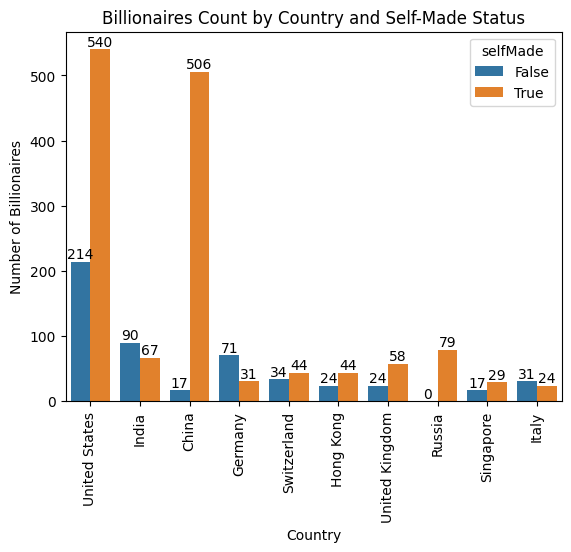

In [15]:
"""sns.barplot(data, x=data['country'].value_counts()[0:10].index,
            y=data['country'].value_counts()[0:10].values, 
            hue="selfMade")"""
top_10_countries = data['country'].value_counts().head(10).index

# Filter the DataFrame for the top 10 countries
b_top_10 = data[data['country'].isin(top_10_countries)]


# Create the grouped bar plot
c_plot = sns.countplot(x='country', hue='selfMade', data= b_top_10)
# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.title('Billionaires Count by Country and Self-Made Status')
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)

plt.show()

              United States and China have most Self-Made Billionaires

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#00005b;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #00005b;
            background-color:#00aeff;
            overflow:hidden;
            font-weight:500">Which Industry produces Most Self-Made Billionaires?</div>

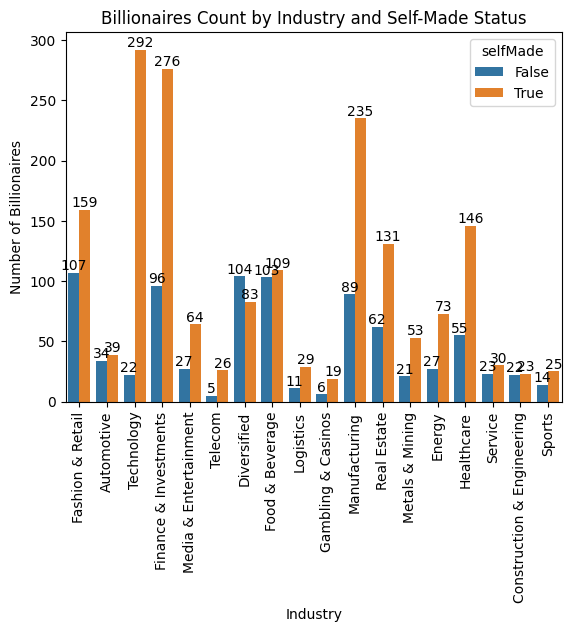

In [16]:
industry = data['industries'].value_counts().index
# Filter the DataFrame for the top 10 countries
c_top_10 = data[data['industries'].isin(industry)]


# Create the grouped bar plot
c_plot = sns.countplot(x='industries', hue='selfMade', data= c_top_10)
# Adding labels and title
plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.title('Billionaires Count by Industry and Self-Made Status')
c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)

**Technology** and **Finance & Investments** industries produce the **most Self-Made Billionaires**

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#ffff00;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #ffff00;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">Percentage Count of Male and Female Billionaires: </div>

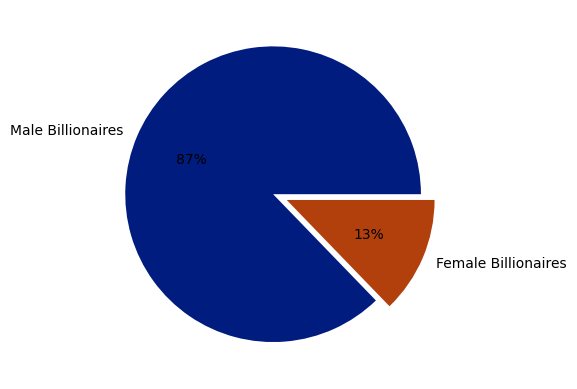

In [17]:
d = data['gender']
d =d.map({'M': 'Male Billionaires', 'F': 'Female Billionaires'})


val = d.value_counts().values 
keys = d.value_counts().index

explode = [0, 0.1] 
# define Seaborn color palette to use 
palette_color = sns.color_palette('dark') 
  
# plotting data on chart 
plt.pie(val, labels=keys, colors=palette_color, 
        explode=explode, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

**87%** of Billionaires are **Male**

**13%** of Billionaires are **Female**

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#ffffff;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #ffffff;
            background-color:#078539;
            overflow:hidden;
            font-weight:500">Distribution of Ages of Billionaires:  </div>

<Axes: xlabel='age', ylabel='Count'>

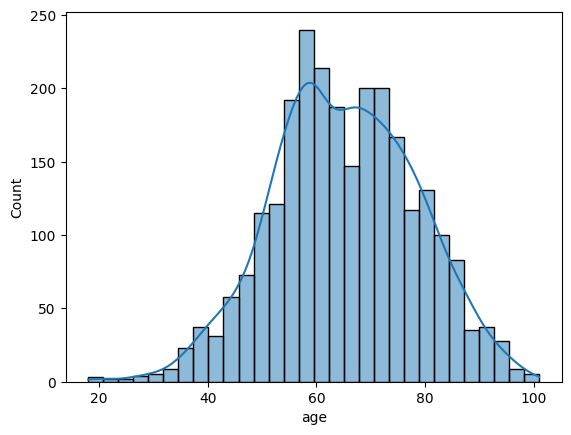

In [18]:
sns.histplot(data=data, x='age', kde=True)

**60% of Billionaires** fall in the **Age Range 50-70**

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#ffffff;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #ffffff;
            background-color:#00a0ff;
            overflow:hidden;
            font-weight:500">Average Age of Billionaires in Countries:  </div>

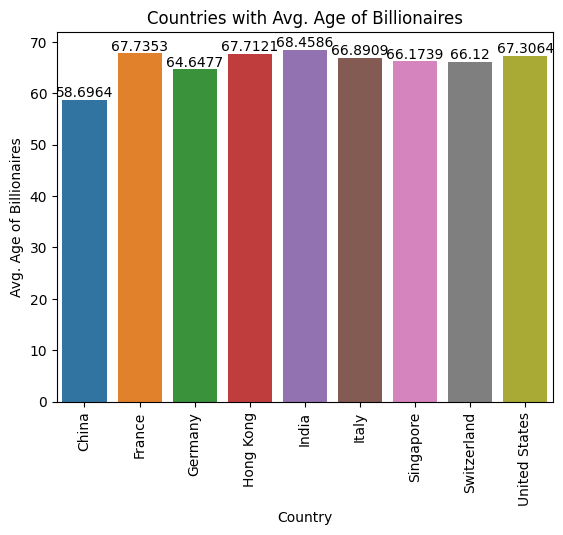

In [19]:
d = data[['country','age']]
# Group by 'country' and calculate the average age for each country
avg_age = d.groupby('country')['age'].mean().reset_index()
avg_age.columns = ['country', 'avg age of billionaires']

countries = ['United States', 'India','China', 'France','United Kingdom'
            'Russia','Hong Kong', 'Italy','Switzerland','Singapore','Germany']
top_countries_age = avg_age.loc[avg_age['country'].isin(countries)]


c_plot = sns.barplot(x=top_countries_age['country'],
                     y=top_countries_age['avg age of billionaires'])

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Avg. Age of Billionaires')
plt.title('Countries with Avg. Age of Billionaires')

c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=90)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()

**Average age** of **Billionaires** in the **US is 67.3 years**

**Average age** of **Billionaires** in **China is 58.6 years**

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#ffffff;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #ffffff;
            background-color:#007f00;
            overflow:hidden;
            font-weight:500">Distribution of Each Industry in Total Wealth: </div>

<Axes: xlabel='age', ylabel='Count'>

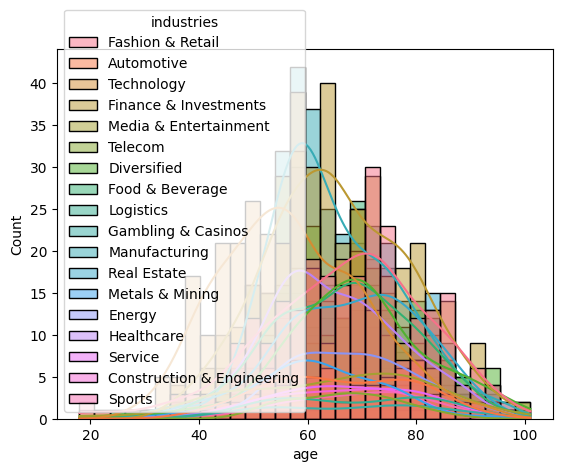

In [20]:

sns.histplot(data=data, x="age", hue = 'industries',kde=True)
#sns.histplot(data=data, x="age", hue = 'country')

# Average Age comparison of top10 Countries Billionaires to Life Expectancy:

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#ffff00;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #ffff00;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">Average Age comparison of top10 Countries Billionaires to Life Expectancy: </div>

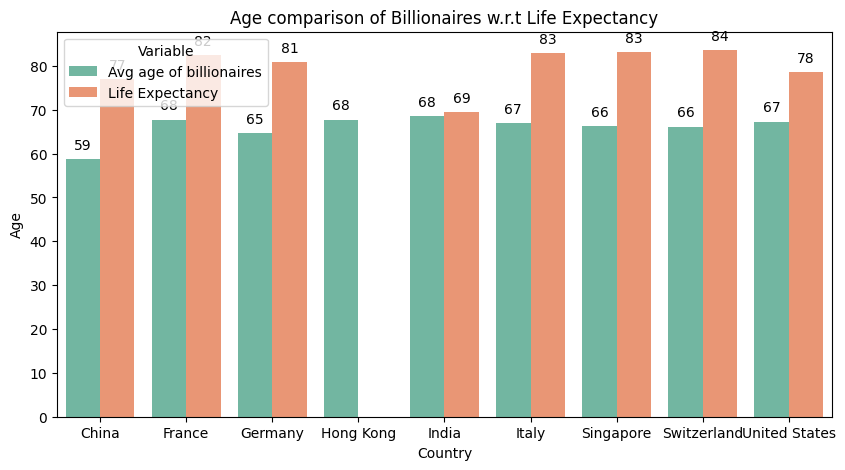

In [21]:
d= data[['country','age', 'life_expectancy_country']]
avg_age = d.groupby('country')[['age','life_expectancy_country']].mean().reset_index()
avg_age.columns = ['Country', 'Avg age of billionaires', 'Life Expectancy']
countries = ['United States', 'India','China', 'France','United Kingdom'
            'Russia','Hong Kong', 'Italy','Switzerland','Singapore','Germany']
top_countries_age = avg_age.loc[avg_age['Country'].isin(countries)]
top_countries_age.fillna(85.39)

#Displaying Graph

# Melt the DataFrame to convert it to long format
df_long = pd.melt(top_countries_age, id_vars='Country', var_name='Variable', value_name='Value')

plt.figure(figsize=(10,5))
# Create a barplot with color
c_plot = sns.barplot(x='Country', y='Value', hue='Variable', data=df_long, palette='Set2')

# Customize the plot
plt.title('Age comparison of Billionaires w.r.t Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(title='Variable')

"""for i in c_plot.containers:
    c_plot.bar_label(i,)"""
    
for p in c_plot.patches:
    c_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#005800;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:#005800;
            background-color:#00ff00;
            overflow:hidden;
            font-weight:500">Distribution of Wealth of Billionaires: </div>

<Axes: xlabel='finalWorth', ylabel='Count'>

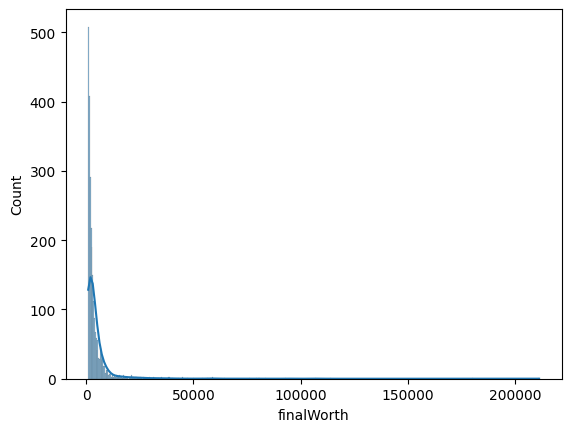

In [22]:
sns.histplot(data=data, x='finalWorth', kde=True)


<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#000000;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:#000000;
            background-color:#ffffff;
            overflow:hidden;
            font-weight:500">Comparing Wealth with Age and Gender using Spider Chart</div>

In [23]:
import pandas as pd
import plotly.express as px



d = data[['finalWorth','age','gender']]
d = d.rename(columns={'age': 'Age',
                        'gender': 'Gender',
                        'finalWorth':'Wealth'})

d = d.dropna()
df = pd.DataFrame(d)

# Convert 'Gender' to numeric representation (e.g., Male: 0, Female: 1)
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# Normalize the data for better comparison
df_normalized = (df - df.min()) / (df.max() - df.min())

# Create a spider plot using Plotly Express
fig = px.line_polar(
    df_normalized,
    r=['Age', 'Wealth', 'Gender'],
    theta=['Age', 'Wealth', 'Gender'],
    line_close=True,
    
)

# Update layout for better visualization
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True
)

# Show the plot
fig.show()


           With Increase in Age, Wealth Increases despite the Gender

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:0000ff;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #0000ff;
            background-color:#00acff;
            overflow:hidden;
            font-weight:500">That's all Data Scientists. Accepting your kind Suggestions. Do UPVOTE 👍 if you find it Useful</div>